In [3]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt

dfsf = pd.read_csv("CSCI_Fall_2024_survey.csv")

#dfsf.head(3)

In [58]:
#A) Import and clean the attached data about your classmates
#A1-Standardizing the name of where everyone is from. 
#Missouri, St. Louis Mo, st. louis, mo, Missouri, USA, st.louis mo, Saint Louis, Missouri, United States Missouri == MO
#India, india, I was born in Chandigarh, India! == IN
#Georgia == GE
#Mexico == MX
#New Jersey == NJ
#Wisconsin == WI
#Frankfurt, Germany == DE
#Kansas, Overland Park == KS
#Oklahoma == OK
#People's Republic of China == CN
#Cameroon == CM
#TEXAS == TX
#Kazakhstah == KZ

dfsf["Where are you From?"]=np.where(dfsf['What state/country were you born in?']=="Mexico","MX",
                                np.where(dfsf['What state/country were you born in?']=="Wisconsin","WI",
                                np.where(dfsf['What state/country were you born in?']=="Georgia (the country not the state)","GE",
                                np.where(dfsf['What state/country were you born in?']=="TEXAS","TX",
                                np.where(dfsf['What state/country were you born in?']=="New Jersey","NJ",
                                np.where(dfsf['What state/country were you born in?']=="Frankfurt, Germany","DE",
                                np.where(dfsf['What state/country were you born in?']=="I was born in Chandigarh, India!","ID",
                                np.where(dfsf['What state/country were you born in?']=="india","ID",
                                np.where(dfsf['What state/country were you born in?']=="India ","ID",
                                np.where(dfsf['What state/country were you born in?']=="Kansas, Overland Park","KS",
                                np.where(dfsf['What state/country were you born in?']=="Oklahoma","OK",
                                np.where(dfsf['What state/country were you born in?']=="People's Republic of China","CN",
                                np.where(dfsf['What state/country were you born in?']=="Cameroon","CM",
                                np.where(dfsf['What state/country were you born in?']=="Kazakhstah","KZ",
                                "Missouri"))))))))))))))

In [81]:
#1
#dfsf['Where are you From?'].value_counts()
dfsf.head(10)

#New column at end named "Where are you From?"

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Where are you From?,Pets,Favorite Food,Majors,Ages
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,Friends,Persona Series,Anything about mythology,My major,cd and ls,MX,Dog,Japanese,CS,18
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,Missouri,None,Mexican,Two Majors,18
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,...,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,DE,None,Italian,CS,18
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,...,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,WI,Dog,Italian,BUS,21
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,...,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,Missouri,None,American,CS,18
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,...,The Office,until dawn,I don't read books,to become a software engineer,print,Missouri,None,Japanese,CS,18
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,...,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is,ID,None,Indian,Two Majors,18
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,...,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls,Missouri,None,Mexican,CS,18
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,...,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd,Missouri,Both,Chinese,CS,18
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,...,GOT,Minecraft,1984,Major Requirement,cd,GE,Both,Mexican,CS,19


In [82]:
#2-Standardize the pets 
#dfsf['How many pets and of which kind do you have?'].value_counts()
#Dog == 1, Dog, I have two dogs and they are both at home, I have two dogs. They're bernedoodles. 2 minature schnauzers
#Dog == 2 dogs, 2, dogs., three dogs
#None == no pets!, 0, none,None :( But I really want a cat!, had 8 dogs, not anymore, no pets, No pets
#Both == 1 dog and 1 cat, 2 cats, one dog, 2, Grumpy the exotic shorthair w heterchromia and my dog Furball is a rescue but he is just as cute
#Both == 1 Cat; 6 Dogs (Over two households)
#Unspecified == 1 

dfsf['Pets']=np.where(dfsf['How many pets and of which kind do you have?']=="1, Dog","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="I have two dogs and they are both at home","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="1 dog and 1 cat","Both",
                        np.where(dfsf['How many pets and of which kind do you have?']=="2 cats, one dog","Both",
                        np.where(dfsf['How many pets and of which kind do you have?']=="I have two dogs. They're bernedoodles.","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="1","None",
                        np.where(dfsf['How many pets and of which kind do you have?']=="2, Grumpy the exotic shorthair w heterchromia and my dog Furball is a rescue but he is just as cute","Both",
                        np.where(dfsf['How many pets and of which kind do you have?']=="2 minature schnauzers","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="2 dogs","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="2, dogs.","Dog",
                        np.where(dfsf['How many pets and of which kind do you have?']=="1 Cat; 6 Dogs (Over two households)","Both",
                        np.where(dfsf['How many pets and of which kind do you have?']=="three dogs","Dog",
                        "None"))))))))))))

dfsf.head(10)


,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Where are you From?,Pets,Favorite Food,Majors,Ages
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,Friends,Persona Series,Anything about mythology,My major,cd and ls,MX,Dog,Japanese,CS,18
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,Missouri,None,Mexican,Two Majors,18
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,...,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,DE,None,Italian,CS,18
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,...,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,WI,Dog,Italian,BUS,21
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,...,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,Missouri,None,American,CS,18
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,...,The Office,until dawn,I don't read books,to become a software engineer,print,Missouri,None,Japanese,CS,18
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,...,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is,ID,None,Indian,Two Majors,18
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,...,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls,Missouri,None,Mexican,CS,18
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,...,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd,Missouri,Both,Chinese,CS,18
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,...,GOT,Minecraft,1984,Major Requirement,cd,GE,Both,Mexican,CS,19


In [84]:
#3-Standardize the favorite food
dfsf['What is your favorite type of food?'].value_counts()
dfsf['Favorite Food']=np.where(dfsf['What is your favorite type of food?']=="Italian","Italian",
                        np.where(dfsf['What is your favorite type of food?']=="Japanese","Japanese",
                        np.where(dfsf['What is your favorite type of food?']=="Mexican","Mexican",
                        np.where(dfsf['What is your favorite type of food?']=="American","American",
                        np.where(dfsf['What is your favorite type of food?']=="Indian","Indian",
                        np.where(dfsf['What is your favorite type of food?']=="Chinese","Chinese",
                        np.where(dfsf['What is your favorite type of food?']=="all of the above","All of them",
                        np.where(dfsf['What is your favorite type of food?']=="korean","Korean",
                        "None"))))))))
dfsf.head(10)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Where are you From?,Pets,Favorite Food,Majors,Ages
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,Friends,Persona Series,Anything about mythology,My major,cd and ls,MX,Dog,Japanese,CS,18
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,Missouri,None,Mexican,Two Majors,18
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,...,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,DE,None,Italian,CS,18
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,...,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,WI,Dog,Italian,BUS,21
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,...,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,Missouri,None,American,CS,18
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,...,The Office,until dawn,I don't read books,to become a software engineer,print,Missouri,None,Japanese,CS,18
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,...,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is,ID,None,Indian,Two Majors,18
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,...,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls,Missouri,None,Mexican,CS,18
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,...,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd,Missouri,Both,Chinese,CS,18
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,...,GOT,Minecraft,1984,Major Requirement,cd,GE,Both,Mexican,CS,19


In [43]:
#4-Standardize the majors
#dfsf['What is your major?'].value_counts()
#CS == Computer Science, Data Science, computer science, Computer Science; considering an additional major or a minor, comp sci, Data science
#CS == Computer Science, B.A. (I might switch to B.S., but I wish to pursue a career in digital IP law, eventually!), computer science, Computer science
#Two Majors == CS/Business, cs/ finance
#BUS == Business Economics, Economics
#BIO == Biology w/ evolutionary bio minor
#N/a == TBD

dfsf['Majors']=np.where(dfsf['What is your major?']=="Data Science","CS",
                            np.where(dfsf['What is your major?']=="Data science","CS",
                            np.where(dfsf['What is your major?']=="CS/Business","Two Majors",
                            np.where(dfsf['What is your major?']=="Business Economics","BUS",
                            np.where(dfsf['What is your major?']=="cs/ finance ","Two Majors",
                            np.where(dfsf['What is your major?']=="Biology w/ evolutionary bio minor","BIO",
                            np.where(dfsf['What is your major?']=="Computer Science","CS",
                            np.where(dfsf['What is your major?']=="computer science","CS",
                            np.where(dfsf['What is your major?']=="TBD","N/a",
                            np.where(dfsf['What is your major?']=="Economics","BUS",
                            np.where(dfsf['What is your major?']=="B.A. (I might switch to B.S., but I wish to pursue a career in digital IP law, eventually!)","CS",
                                     "CS")))))))))))

dfsf.head(2)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Where are you From?,Pets,Favorite Food,Majors
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,18,Friends,Persona Series,Anything about mythology,My major,cd and ls,MX,Dog,Japanese,CS
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,Missouri,None,Mexican,Two Majors


In [83]:
#5-Standardize the ages
#dfsf['Ages'] = dfsf['How old are you?']
dfsf.head(10)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Where are you From?,Pets,Favorite Food,Majors,Ages
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,Friends,Persona Series,Anything about mythology,My major,cd and ls,MX,Dog,Japanese,CS,18
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,Missouri,None,Mexican,Two Majors,18
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,...,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,DE,None,Italian,CS,18
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,...,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,WI,Dog,Italian,BUS,21
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,...,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,Missouri,None,American,CS,18
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,...,The Office,until dawn,I don't read books,to become a software engineer,print,Missouri,None,Japanese,CS,18
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,...,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is,ID,None,Indian,Two Majors,18
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,...,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls,Missouri,None,Mexican,CS,18
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,...,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd,Missouri,Both,Chinese,CS,18
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,...,GOT,Minecraft,1984,Major Requirement,cd,GE,Both,Mexican,CS,19


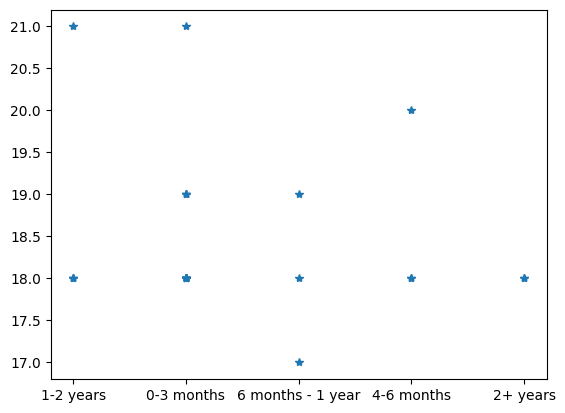

In [79]:
#B) Create 5 matplotlib or pandas visuals that represent the data.
plt.plot(dfsf["How much experience do you have programming?"],dfsf["Ages"],'*')
# Showing the ages of peers and their experience programming.

<Axes: ylabel='Timestamp'>

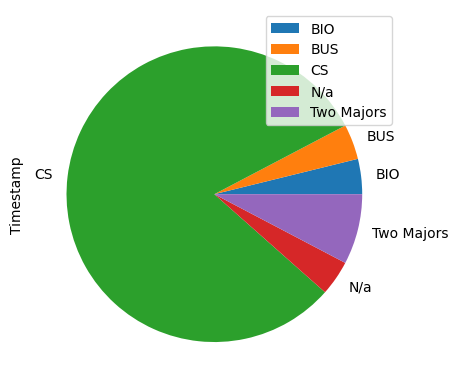

In [68]:
agg_class = dfsf.groupby("Majors").count()
agg_class.plot(kind="pie", y = 'Timestamp')
#Showing a pie chart of class majors, the portions of each major. 

<Axes: ylabel='Timestamp'>

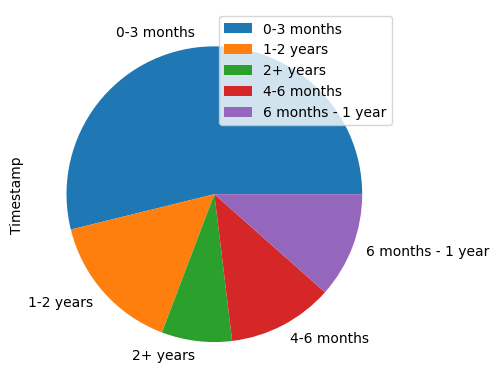

In [78]:
#
agg_class = dfsf.groupby("How much experience do you have programming?").count()
agg_class.plot(kind="pie", y = 'Timestamp')
#Showing the portion of peers and their experience programming.

Text(0.5, 1.0, '')

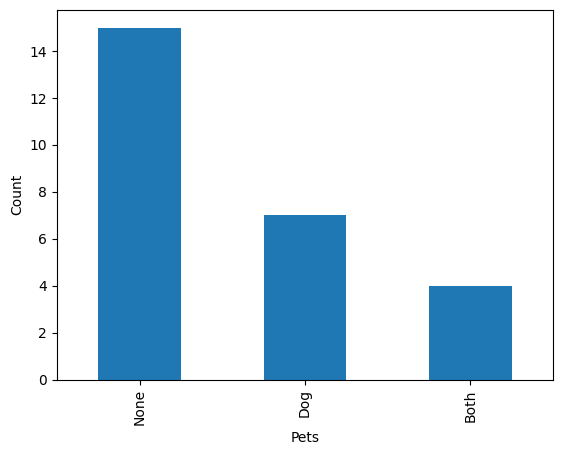

In [77]:
Pets = dfsf["Pets"].value_counts()
Pets.plot(kind ="bar")
plt.xlabel('Pets')
plt.ylabel('Count')
plt.title('')
#Count of Class pets according to dog, none, or both dog and cat. 

Text(0.5, 1.0, 'Count of Classes Favorite Foods')

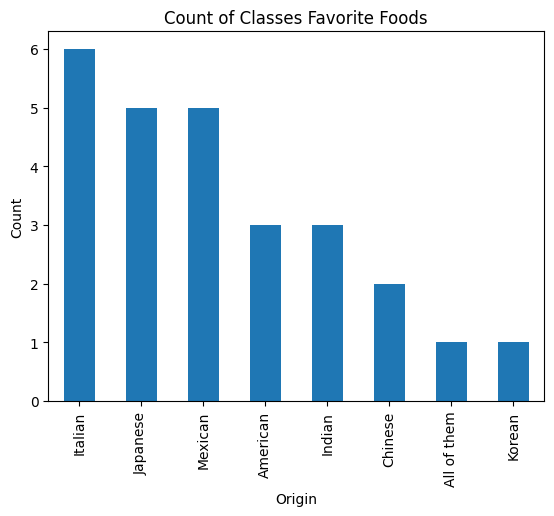

In [80]:
Food = dfsf["Favorite Food"].value_counts()
Food.plot(kind ="bar")
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count of Classes Favorite Foods')
#Showing the count of the classes favorite foods. 